In [1]:
# Importing the libraries
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer

In [2]:
# Importing the Data 
train_main = pd.read_csv("train_main.csv")
train_collision = pd.read_csv("train_collision.csv")

test_main = pd.read_csv("test_main.csv")
test_collision = pd.read_csv("test_collision.csv")

submission_file = pd.read_csv("sample_submission.csv")

In [3]:
print(f'The Main train dataset has a shape of {train_main.shape}')
print(f'The collision train dataset has a shape of {train_collision.shape}')

print(f'\nThe Main test dataset has a shape of {test_main.shape}')
print(f'The collision test dataset has a shape of {test_collision.shape}')

The Main train dataset has a shape of (12918, 5)
The collision train dataset has a shape of (12918, 14)

The Main test dataset has a shape of (8613, 4)
The collision test dataset has a shape of (8613, 14)


In [4]:
train_main.head() 

,id,Run,Lumi,Event,jets
0,1,147926,463,499379866,trijet
1,2,147926,466,502201110,trijet
2,3,149181,992,977223571,tetrajet
3,4,149181,1802,1701566563,bijet
4,5,148029,395,307976436,tetrajet


In [5]:
train_collision.head()

,id,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,2389,628.650,0.003689,344.471,1.97683,-106.3260,258.073,355.6340,5.65705,88.32750,-344.20000,211.617,13.65300,0
1,9073,238.291,0.018975,270.023,101.12500,46.4665,-245.698,94.0115,-87.19800,-9.75658,-25.68270,199.032,10.47860,0
2,7406,1047.610,0.002073,NaN,-57.70030,47.2421,425.894,635.2590,70.86140,-20.33610,-630.79900,226.173,25.82460,0
3,2171,227.925,0.002685,155.943,-102.58900,-5.2552,116.311,112.2300,102.59800,4.14457,4.48955,206.631,1.36038,0
4,12189,207.339,0.039911,158.584,-84.84940,71.5817,-112.407,222.8720,26.13380,-78.36290,-206.39200,193.617,14.76390,0


In [6]:
test_main.head() 

,id,Run,Lumi,Event
0,12919,149181,986,970832428
1,12920,148029,388,302823375
2,12921,147926,465,500653165
3,12922,149181,998,982740964
4,12923,149181,999,983919377


In [7]:
test_collision.head()

,id,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,21519,413.358,0.007247,303.461,129.245,-88.8368,259.134,162.125,-139.8620,58.7003,-50.84160,308.513,7.95099,0
1,17571,433.400,0.012239,586.030,-158.880,-156.0780,541.144,293.401,131.9080,133.0470,205.13400,421.112,10.32080,0
2,14067,727.283,0.005070,222.582,135.759,-33.9291,-171.341,687.033,-121.4970,44.5075,619.90500,350.553,18.73220,0
3,21109,264.239,0.011179,621.691,58.944,-51.0865,-595.472,50.216,-35.3176,34.8864,1.36373,216.692,15.76590,0
4,20966,252.714,0.043178,256.421,-92.690,-86.8980,-222.060,379.302,71.1955,93.5246,-360.36800,244.594,21.02260,0


In [8]:
# Merging the train dataset based on the id column
all_train = pd.merge(train_main, train_collision, on='id')
all_train.head()

,id,Run,Lumi,Event,jets,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,1,147926,463,499379866,trijet,445.014,0.006108,216.512,-29.0855,112.27500,170.5370,242.179,11.17510,-103.53800,-217.6270,229.668,12.067200,0
1,2,147926,466,502201110,trijet,586.373,0.006135,264.180,-70.5705,1.91633,-254.2640,465.672,52.71080,1.75227,322.1140,316.951,29.899100,0
2,3,149181,992,977223571,tetrajet,171.867,0.010596,293.571,-26.9046,-65.60050,-244.0750,979.153,7.21136,62.34720,-968.2280,274.293,4.207830,0
3,4,149181,1802,1701566563,bijet,206.284,0.001646,145.890,-34.3385,93.89570,105.1780,101.597,34.75180,-90.15670,28.6567,196.600,0.723384,0
4,5,148029,395,307976436,tetrajet,442.027,0.018294,218.184,-164.8570,-66.33300,80.0005,638.457,130.78500,33.19930,608.6550,329.856,20.130100,0


In [9]:
# Merging the test dataset based on the id column
all_test = pd.merge(test_main, test_collision, on='id')
all_test.head()

,id,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,12919,149181,986,970832428,NaN,0.029307,120.457,-76.0105,90.3478,7.33196,335.995,54.6022,-81.8029,-321.1300,216.421,26.49590,0
1,12920,148029,388,302823375,458.510,0.019492,163.387,24.5406,158.4730,-4.60408,526.645,-43.4568,-135.5140,-506.9020,302.674,25.89480,0
2,12921,147926,465,500653165,293.970,0.007790,439.602,-65.3710,45.9664,-432.20800,138.709,65.3656,-33.2417,10.9599,213.441,9.41553,0
3,12922,149181,998,982740964,NaN,0.013672,206.016,145.5270,61.2885,-127.73100,390.826,-113.4350,-42.3830,342.0280,287.189,23.72230,0
4,12923,149181,999,983919377,249.195,0.015829,331.879,17.4356,-120.4170,308.07200,114.895,-20.9184,93.8337,60.1980,217.810,8.55428,0


In [10]:
# Checking for missing values
(all_train.isnull().sum()/all_train.shape[0])*100

id         0.000000
Run        0.000000
Lumi       0.000000
Event      0.000000
jets       0.000000
MR        19.995355
Rsq        0.000000
E1         9.993807
Px1        0.000000
Py1        0.000000
Pz1        0.000000
E2         0.000000
Px2        0.000000
Py2        0.000000
Pz2        0.000000
HT         0.000000
MET        0.000000
nBJets     0.000000
dtype: float64

<AxesSubplot:>

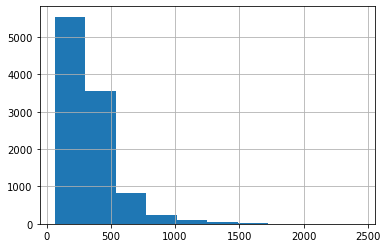

In [11]:
all_train['MR'].hist()

<AxesSubplot:>

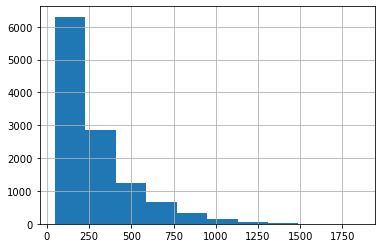

In [12]:
all_train['E1'].hist()

In [13]:
# Checking for missing values on the test dataset
(all_test.isnull().sum()/all_test.shape[0])*100

id         0.000000
Run        0.000000
Lumi       0.000000
Event      0.000000
MR        19.993034
Rsq        0.000000
E1         9.984907
Px1        0.000000
Py1        0.000000
Pz1        0.000000
E2         0.000000
Px2        0.000000
Py2        0.000000
Pz2        0.000000
HT         0.000000
MET        0.000000
nBJets     0.000000
dtype: float64

In [14]:
# Imputing the Missing values with the median value
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
all_train[['E1', 'MR']] = imp_median.fit_transform(all_train[['E1', 'MR']])
all_test[['E1', 'MR']] = imp_median.transform(all_test[['E1', 'MR']])

In [15]:
# Categorical Encoding for the train set 
factor = pd.factorize(all_train["jets"])
all_train["jets"] = factor[0]
defs = factor[1]

In [16]:
all_train.head()

,id,Run,Lumi,Event,jets,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,1,147926,463,499379866,0,445.014,0.006108,216.512,-29.0855,112.27500,170.5370,242.179,11.17510,-103.53800,-217.6270,229.668,12.067200,0
1,2,147926,466,502201110,0,586.373,0.006135,264.180,-70.5705,1.91633,-254.2640,465.672,52.71080,1.75227,322.1140,316.951,29.899100,0
2,3,149181,992,977223571,1,171.867,0.010596,293.571,-26.9046,-65.60050,-244.0750,979.153,7.21136,62.34720,-968.2280,274.293,4.207830,0
3,4,149181,1802,1701566563,2,206.284,0.001646,145.890,-34.3385,93.89570,105.1780,101.597,34.75180,-90.15670,28.6567,196.600,0.723384,0
4,5,148029,395,307976436,1,442.027,0.018294,218.184,-164.8570,-66.33300,80.0005,638.457,130.78500,33.19930,608.6550,329.856,20.130100,0


In [17]:
all_train.nunique()

id        12918
Run           4
Lumi         28
Event     12918
jets          3
MR        10173
Rsq       12840
E1        11454
Px1       12829
Py1       12846
Pz1       12871
E2        12758
Px2       12856
Py2       12850
Pz2       12875
HT        12499
MET       12709
nBJets        3
dtype: int64

In [18]:
all_train['Run'].unique()

array([147926, 149181, 148029, 147929])

In [19]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12918 entries, 0 to 12917
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12918 non-null  int64  
 1   Run     12918 non-null  int64  
 2   Lumi    12918 non-null  int64  
 3   Event   12918 non-null  int64  
 4   jets    12918 non-null  int64  
 5   MR      12918 non-null  float64
 6   Rsq     12918 non-null  float64
 7   E1      12918 non-null  float64
 8   Px1     12918 non-null  float64
 9   Py1     12918 non-null  float64
 10  Pz1     12918 non-null  float64
 11  E2      12918 non-null  float64
 12  Px2     12918 non-null  float64
 13  Py2     12918 non-null  float64
 14  Pz2     12918 non-null  float64
 15  HT      12918 non-null  float64
 16  MET     12918 non-null  float64
 17  nBJets  12918 non-null  int64  
dtypes: float64(12), int64(6)
memory usage: 1.9 MB


In [20]:
from sklearn.model_selection import train_test_split

X = all_train.drop(["jets", "id"], axis=1)
y = all_train['jets']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
# X_test = scaler.transform(all_test)



In [22]:
clf = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_valid)
accuracy_score(preds, y_valid)

0.77218782249742

In [23]:
np.unique(preds)

array([0, 1, 2])

In [26]:
all_test.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,149181,986,970832428,289.674,0.029307,120.457,-76.0105,90.3478,7.33196,335.995,54.6022,-81.8029,-321.1300,216.421,26.49590,0
1,148029,388,302823375,458.510,0.019492,163.387,24.5406,158.4730,-4.60408,526.645,-43.4568,-135.5140,-506.9020,302.674,25.89480,0
2,147926,465,500653165,293.970,0.007790,439.602,-65.3710,45.9664,-432.20800,138.709,65.3656,-33.2417,10.9599,213.441,9.41553,0
3,149181,998,982740964,289.674,0.013672,206.016,145.5270,61.2885,-127.73100,390.826,-113.4350,-42.3830,342.0280,287.189,23.72230,0
4,149181,999,983919377,249.195,0.015829,331.879,17.4356,-120.4170,308.07200,114.895,-20.9184,93.8337,60.1980,217.810,8.55428,0


In [ ]:
# Dropping the Id column from the test data
ids = all_test["id"].tolist()
all_test = all_test.drop("id", axis=1)

In [28]:
# Scale the test data 
test = scaler.transform(all_test)

# Generate predictions 
test_preds = clf.predict(test)

In [31]:
submission_file.head()

,id,jets
0,12919,bijet
1,12920,bijet
2,12921,bijet
3,12922,bijet
4,12923,bijet


In [36]:
dict1 = dict(zip(range(3), defs))
test_preds_as_str = [dict1[pred] for pred in test_preds]
pd_dict = {'id': ids, 'jets':test_preds_as_str}
submission = pd.DataFrame(pd_dict)
submission.head()

,id,jets
0,12919,bijet
1,12920,bijet
2,12921,trijet
3,12922,trijet
4,12923,bijet
